In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    confusion_matrix,
    make_scorer,
    precision_score,
    recall_score,
    RocCurveDisplay,
    roc_auc_score,
    r2_score
)

In [2]:
df =pd.read_csv("A:\Data Analytics\Hospital readmission\hospital_readmissions.csv")
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [32]:
df.shape

(25000, 17)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [3]:
df.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [36]:
cols = ['medical_specialty','diag_1','diag_2','diag_3']
for i in cols:
    print(i)
    print(df[i].unique())

medical_specialty
['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3
['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']


In [37]:
df['diag_1'] = np.where(df['diag_1'] == 'Other', 
                            np.where(df['diag_2'] == 'Other',
                                     df['diag_3'],
                                     df['diag_2']
                                    ), 
                            df['diag_1'])
df['diag_1'].value_counts(normalize=True)

diag_1
Circulatory        0.39128
Respiratory        0.17760
Diabetes           0.12628
Digestive          0.10988
Injury             0.07576
Other              0.06272
Musculoskeletal    0.05600
Missing            0.00048
Name: proportion, dtype: float64

In [4]:
binaryCols = ['change','diabetes_med','readmitted']
for i in binaryCols:
    df[i] = df[i].apply(lambda x: 0 if x == 'no' else 1)

In [5]:
noNormalHighCols = ['glucose_test','A1Ctest']
le = LabelEncoder()
for i in noNormalHighCols:
    #df_all[i] = le.fit_transform(df_all[i])
    df[i+'_ind'] = df[i].apply(lambda x: 0 if x == 'no' else 1 if x == 'normal' else 2)

df['age_t'] = le.fit_transform(df['age'])

NameError: name 'LabelEncoder' is not defined

In [ ]:
df

# What is the most common primary diagnosis by age group?

In [ ]:
value_count = df['age'].value_counts()
value_count

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
value_count = df['age'].value_counts()
age_order = ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

# Sorting the value_counts Series based on age_order
value_count_sorted = value_count.loc[age_order]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(value_count_sorted.index, value_count_sorted, palette = sns.color_palette('rocket', 6)[::-1]))

for p in ax.patches:
    value = f'{p.get_height():,.2f}'  # Format value to 2 decimal places with comma separator
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.title('Value Counts of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Display the plot
plt.show()


In [ ]:


# Set the seaborn style to use pastel colors
sns.color_palette("husl", 9)

# Assuming df is your DataFrame
value_count = df['age'].value_counts()
age_order = ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

# Sorting the value_counts Series based on age_order
value_count_sorted = value_count.loc[age_order]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(value_count_sorted.index, value_count_sorted, sns.color_palette("husl", 9))

# Adding labels and title
plt.title('Value Counts of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')

# Display the plot
plt.show()


In [ ]:
sns.set_style('darkgrid')
sns.countplot(data = df, x = 'age', palette = sns.color_palette("husl", 6)[::-1])
plt.title('Number of admissions categorized by patient age.')
plt.show()

df['age'] = df['age'].astype('category')
df['age'] = df['age'].cat.reorder_categories(new_categories = ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'], ordered = True)
df = df['age'].value_counts().reset_index().rename(columns = {'index':'age', 'age':'count'}).sort_values('age', ascending = True)


for p in ax.patches:
    value = f'{p.get_height():,.2f}'  # Format value to 2 decimal places with comma separator
    ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Admissions by Age Category.')
plt.show()

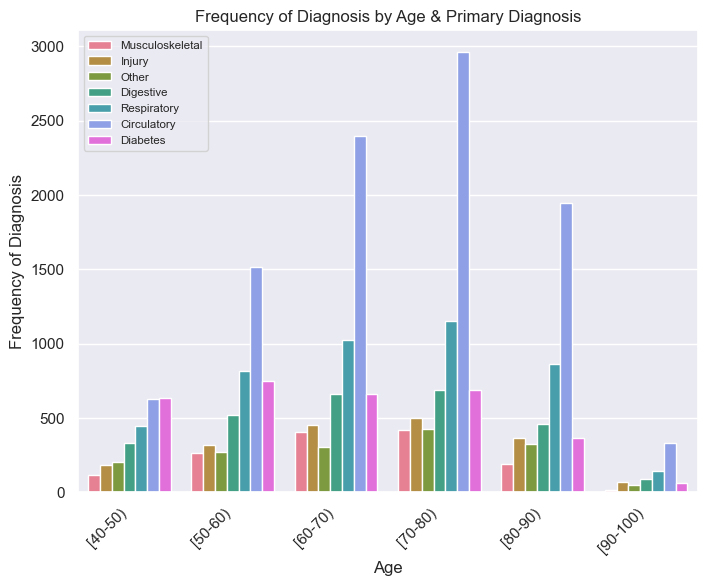

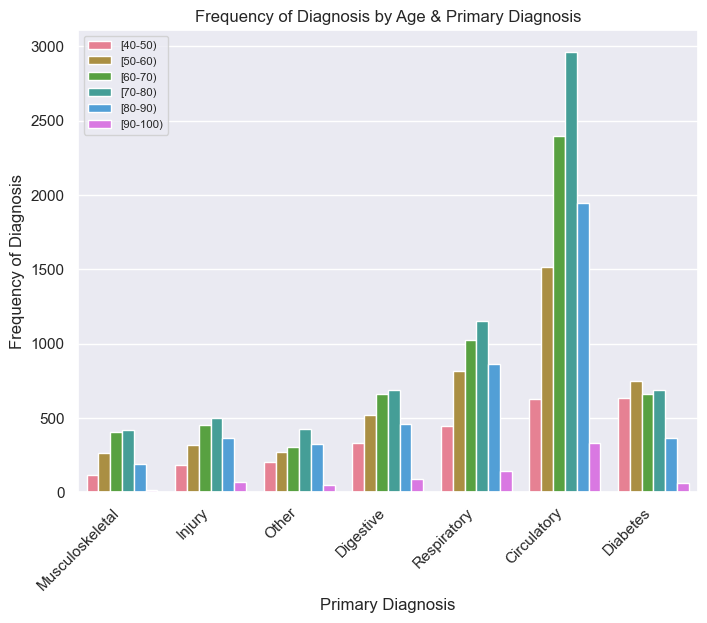

In [79]:
groupings = [['age',True,'Age','Primary Diagnosis'],
             ['diag_2',False,'Primary Diagnosis','Age']]

for i in groupings:
    df_chart = df.groupby(['age','diag_1']).agg({'diag_2':'count'}).reset_index().sort_values(i[0],ascending=i[1])
    df_chart = df_chart.rename(columns={'age': 'Age',
                                        'diag_1':'Primary Diagnosis',
                                        'diag_2':'Frequency'}).sort_values(by=['Age','Frequency'])
    df_chart = df_chart[df_chart['Primary Diagnosis'] != 'Missing']

    chart = sns.barplot(data=df_chart,x=i[2],y="Frequency",hue=i[3],palette = 'husl')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper left',fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Frequency of Diagnosis')
    plt.title("Frequency of Diagnosis by Age & Primary Diagnosis")
    plt.show()

#  Explore the effect of a diabetes diagnosis on readmission rates.

In [6]:
diagCols = ['diag_1','diag_2','diag_3']
diag = 'Diabetes'

df['Diabetes_ind'] = (df['diag_1'].str.contains(diag) | df['diag_2'].str.contains(diag) | df['diag_3'].str.contains(diag)) * 1

In [7]:
df[['Diabetes_ind','readmitted']].value_counts(normalize=True)

Diabetes_ind  readmitted
0             0             0.34188
              1             0.30660
1             0             0.18796
              1             0.16356
Name: proportion, dtype: float64

In [8]:
#Quick Look at readmission rates (normalized value_counts)
print(df[['Diabetes_ind']].value_counts(normalize=False))
print(df[['Diabetes_ind']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print('')

print(df[['Diabetes_ind','readmitted']].value_counts(normalize=False))
print(df[['Diabetes_ind','readmitted']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
#Early look suggests Diabetes Diagnosis does not suggest disproportionate rates of hospital readmission
#Next step, let's look graphically at Readmittance rates by age buckets and various indicators of diabetes beyond diagnosis


Diabetes_ind
0               16212
1                8788
Name: count, dtype: int64
Diabetes_ind
0               64.8%
1               35.2%
Name: proportion, dtype: object

Diabetes_ind  readmitted
0             0             8547
              1             7665
1             0             4699
              1             4089
Name: count, dtype: int64
Diabetes_ind  readmitted
0             0             34.2%
              1             30.7%
1             0             18.8%
              1             16.4%
Name: proportion, dtype: object


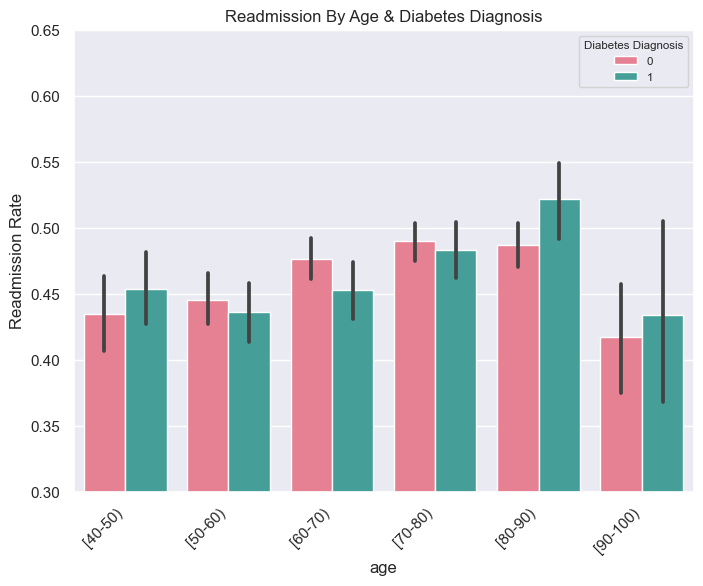

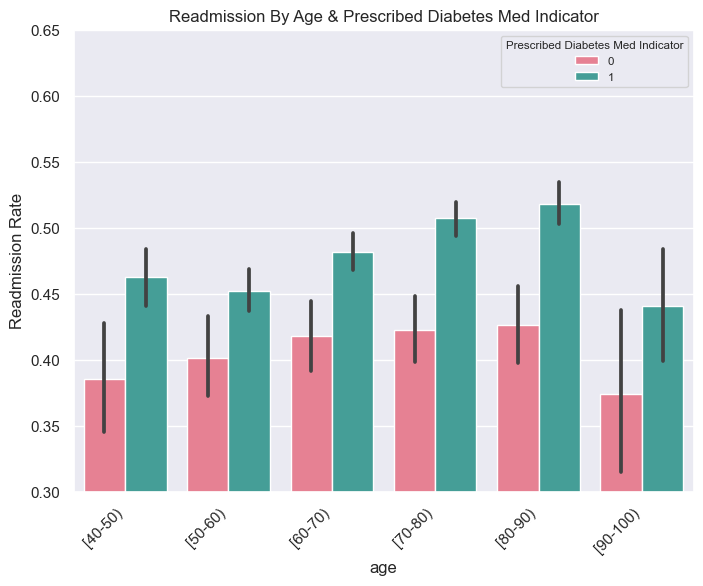

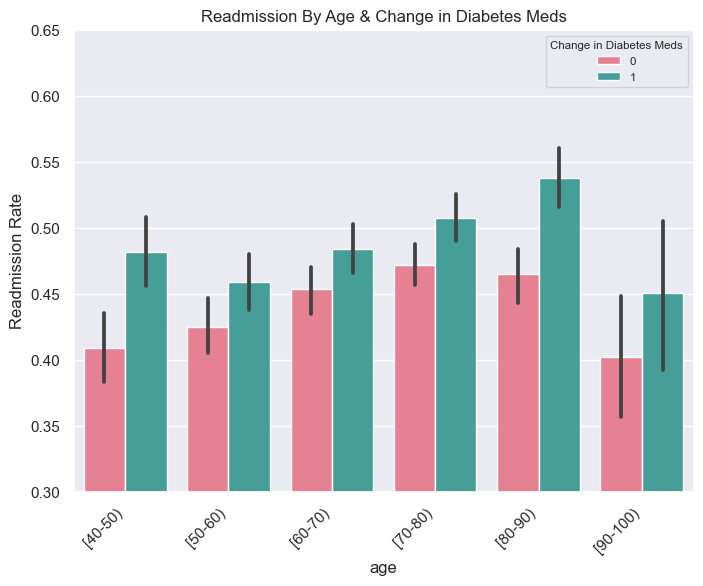

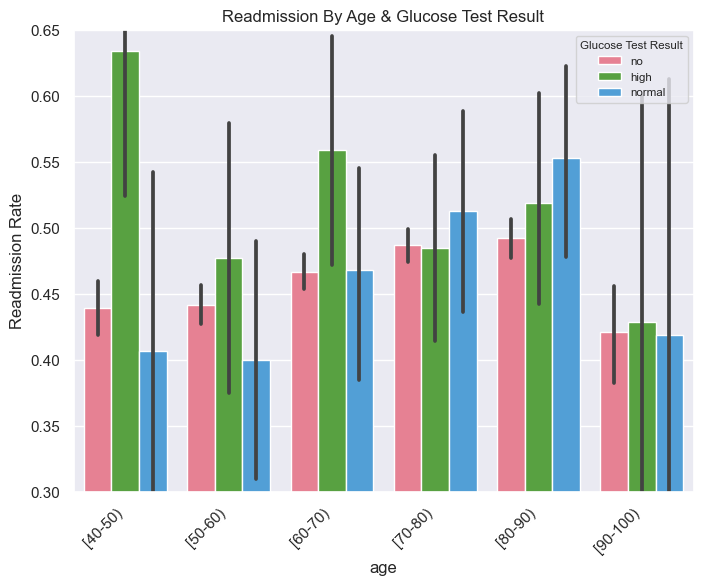

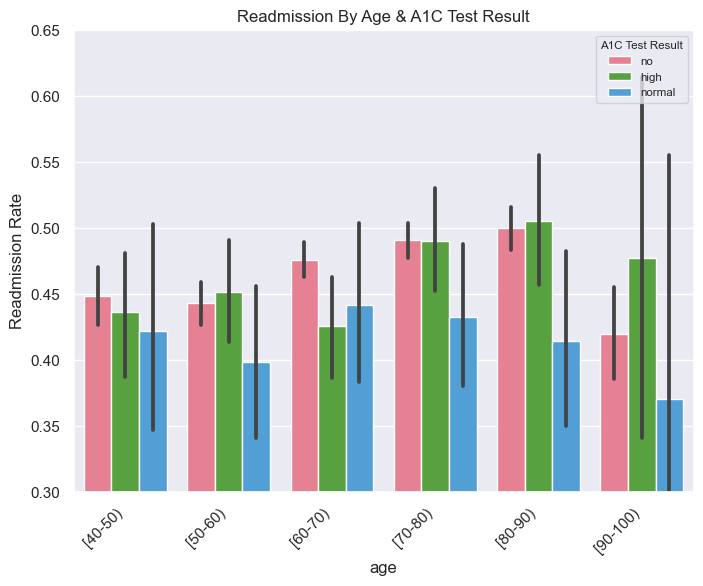

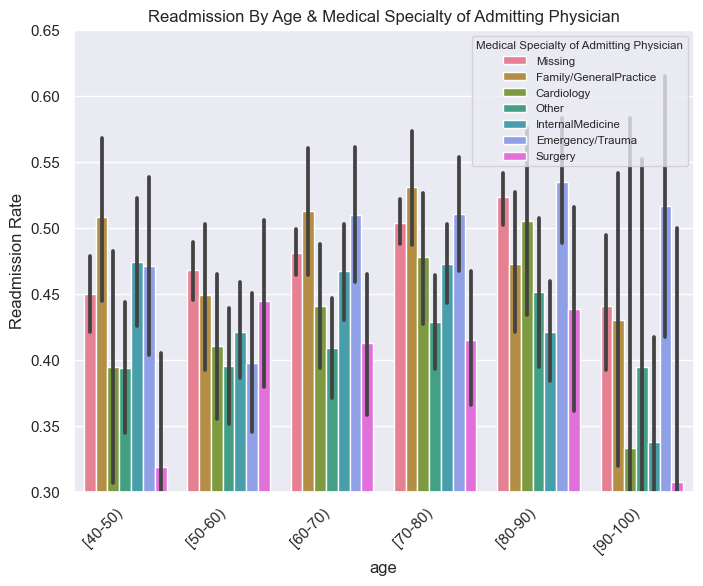

In [85]:
cols = {'Diabetes_ind':'Diabetes Diagnosis',
        'diabetes_med':'Prescribed Diabetes Med Indicator',
        'change':'Change in Diabetes Meds', 
        'glucose_test':'Glucose Test Result',
        'A1Ctest':'A1C Test Result',
        'medical_specialty':'Medical Specialty of Admitting Physician'
        }
df_chart = df.sort_values('age')

for i in cols.keys():
    chart = sns.barplot(data=df_chart,x='age',y="readmitted",hue=i,palette = 'husl')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set(ylim=(0.3, 0.65))
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper right',title=cols[i],fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Readmission Rate')
    plt.title("Readmission By Age & "+cols[i])
    plt.show()

# On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

Lasso Regression was utilized for feature selection. By increasing the alpha parameter of the model, we see that the most important varaiables in the dataset in terms of predicting readmission are: 'n_lab_procedures', 'diabetes_med', 'n_inpatient', 'n_emergency', and 'change'. In this case, number of inpatient/emergency visits a patient has had in the previous year rise in prominence in the model. Additionally, we see further confirmation in the data that the initial prescription of a diabetes medication or a change in medication is predictive of readmission.

In [9]:
quantCols = df.select_dtypes(include=[int,float]).columns

# Create new DataFrame with clustering variables
df_features = df[quantCols]

df_features

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,change,diabetes_med,readmitted,Diabetes_ind
0,8,72,1,18,2,0,0,0,1,0,0
1,3,34,2,13,0,0,0,0,1,0,0
2,5,45,0,18,0,0,0,1,1,1,0
3,2,36,0,12,1,0,0,1,1,1,1
4,1,42,0,7,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,0,0,1,0
24996,2,66,0,24,0,0,0,1,1,1,0
24997,5,12,0,6,0,1,0,0,0,1,0
24998,2,61,3,15,0,0,0,1,1,0,1


 Objective: Looks at the distribution of the feature variariables and see if there is any non-normality.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


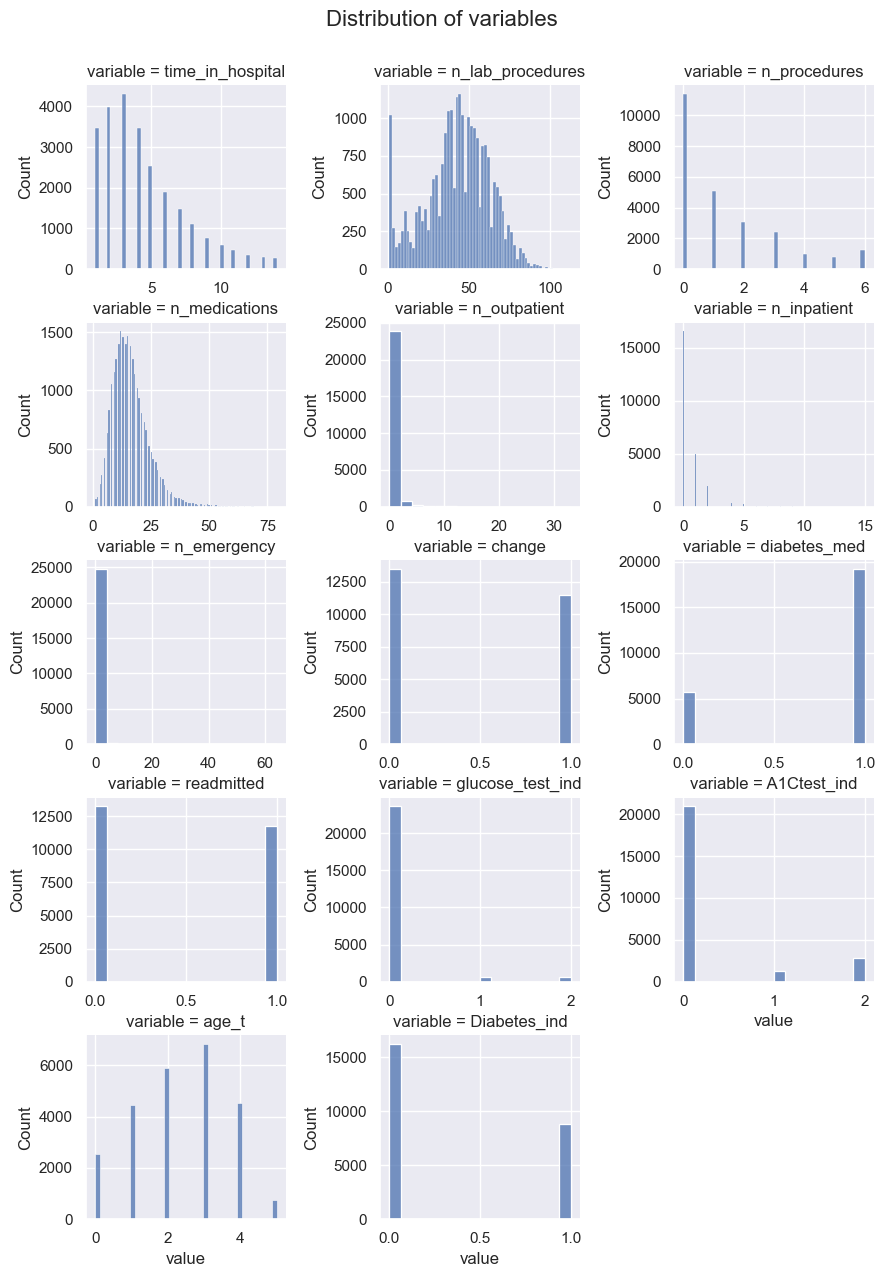

In [89]:

# Plot the distributions of the selected variables
g = sns.FacetGrid(
    df_features.melt(),  # Reformat the DataFrame for plotting purposes
    col='variable',  # Split on the 'variable' column created by reformating
    sharey=False,  # Turn off shared y-axis
    sharex=False,  # Turn off shared x-axis
    col_wrap = 3
)
# Apply a histogram to the facet grid
g.map(sns.histplot, "value")
# Adjust the top of the plots to make room for the title
g.fig.subplots_adjust(top=0.8)
# Create a title
g.fig.suptitle("Distribution of variables", fontsize=16,y=.85)
plt.show()

In [ ]:
def corr_matrix(dataframe, x, y, title):
    plt.subplots(figsize=(x, y))
    plt.title(title, fontsize=16,y=1.03)
    return sns.heatmap(dataframe.corr(), cmap='YlGnBu', fmt='.2g', annot=True)

plt.title('Heatmap showing correlation amongst variables',y=1.03)
plt.show()

<Axes: title={'center': 'Heatmap showing Correlation among variables'}>

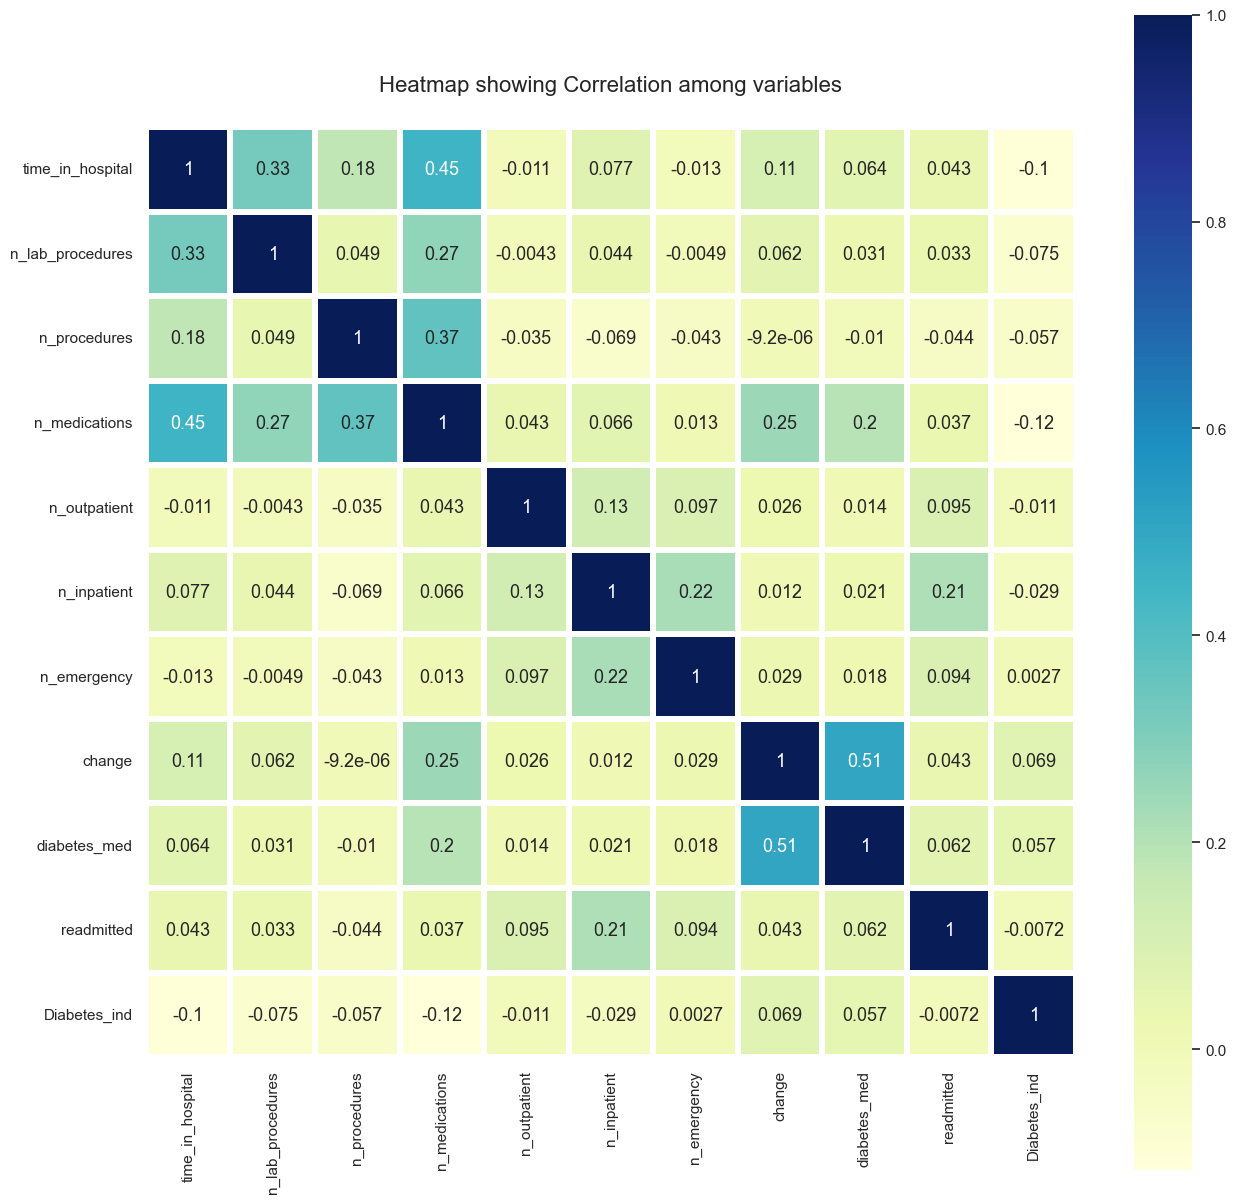

In [31]:
def corr_matrix(dataframe, x, y, title):
    plt.subplots(figsize=(x, y))
    plt.title(title, fontsize=16,y=1.03)
    return sns.heatmap(dataframe.corr(),cmap='YlGnBu',
            annot=True,
            linewidths=3,
            annot_kws={"fontsize":13},
            square=True,
           )

corr_matrix(df_features, 15, 15, 'Heatmap showing Correlation among variables')

In [91]:
df['readmitted'].value_counts(normalize=True)

readmitted
0    0.52984
1    0.47016
Name: proportion, dtype: float64

In [92]:
df[['Diabetes_ind','readmitted']].value_counts(normalize=True)

Diabetes_ind  readmitted
0             0             0.34188
              1             0.30660
1             0             0.18796
              1             0.16356
Name: proportion, dtype: float64

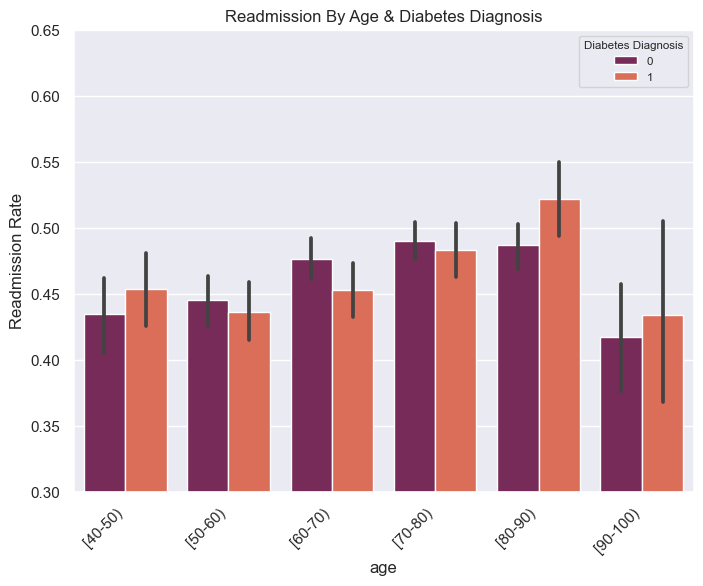

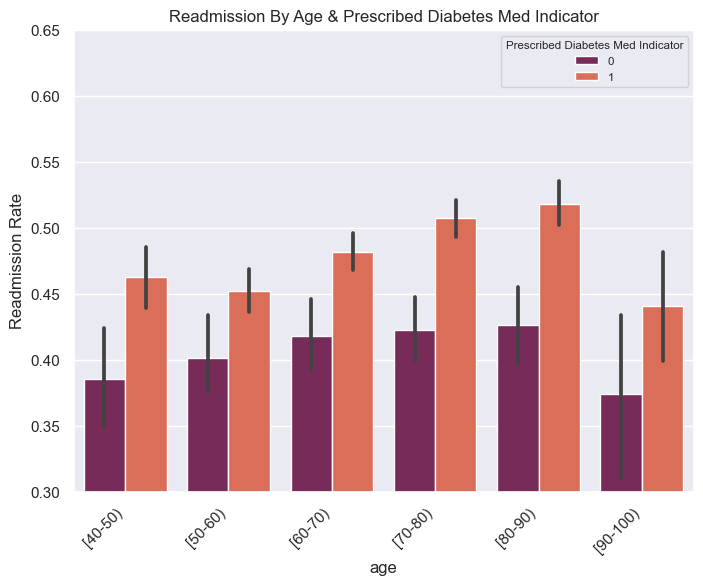

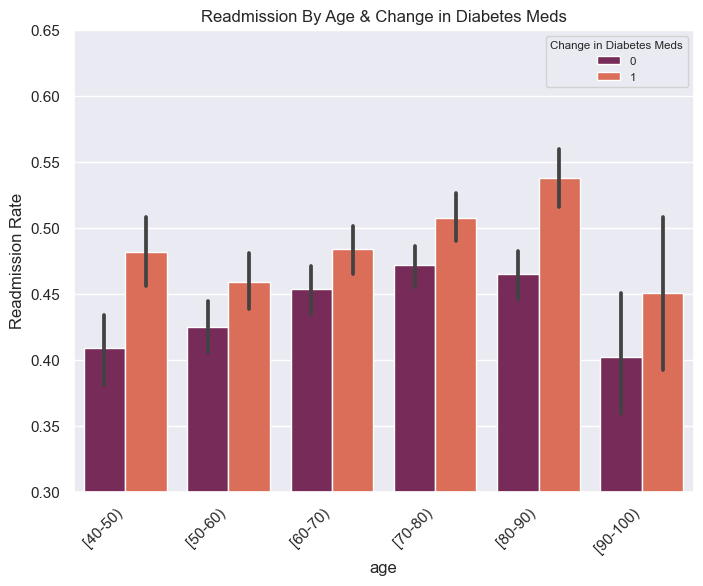

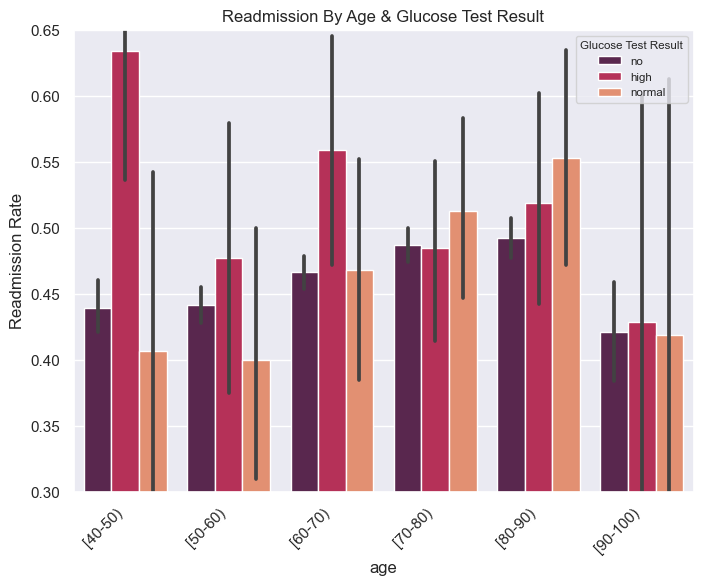

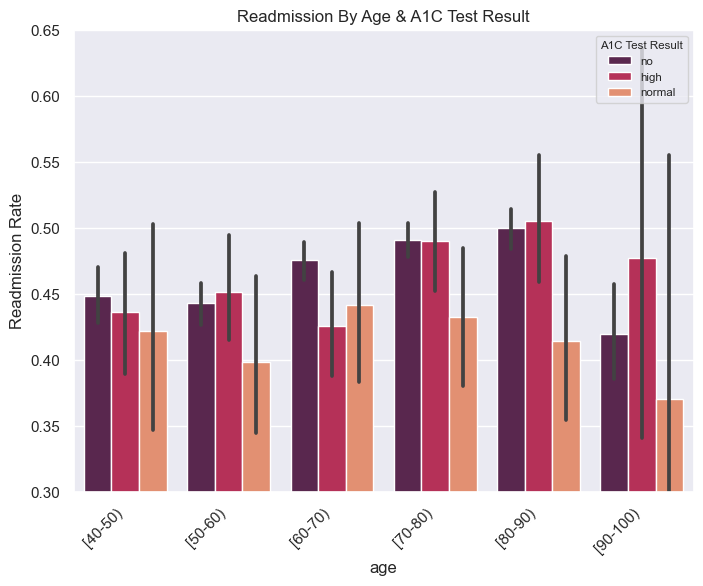

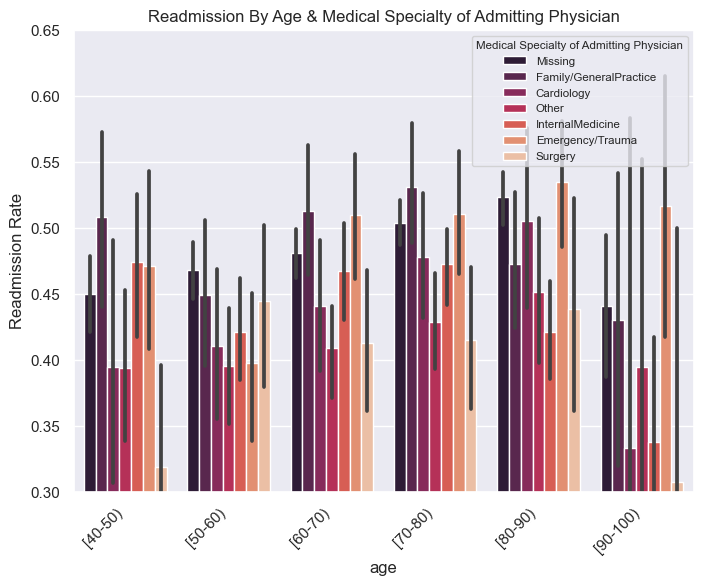

In [93]:
cols = {'Diabetes_ind':'Diabetes Diagnosis',
        'diabetes_med':'Prescribed Diabetes Med Indicator',
        'change':'Change in Diabetes Meds', 
        'glucose_test':'Glucose Test Result',
        'A1Ctest':'A1C Test Result',
        'medical_specialty':'Medical Specialty of Admitting Physician'
        }
df_chart = df.sort_values('age')

for i in cols.keys():
    chart = sns.barplot(data=df_chart,x='age',y="readmitted",hue=i,palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set(ylim=(0.3, 0.65))
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper right',title=cols[i],fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Readmission Rate')
    plt.title("Readmission By Age & "+cols[i])
    plt.show()

# Look for Collinearity in the Data

In [94]:
#Let's use a pairplot as a convenient way to visualize the numeric information to see if there are any correlations among the data
#Notice the linear relationships in the following variables: n_lab_procedures, n_medications, n_procedures, time_in_hospital and n_inpatient


g = sns.pairplot(data=df_processed.sample(10000), 
#could use either df_processed or df_features 
#df_processed should show no associations between features as those have been decomposed via PCA
#df_features will show the associations in raw data
             vars = ['n_lab_procedures', 'n_inpatient', 'time_in_hospital', 
                     'n_emergency', 'n_procedures', 'n_medications'],  
             kind="scatter", # kind of plots for each pair {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             diag_kind="kde",   # kind of plots on the diagonal {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             hue="readmitted",
             height=2,
             aspect=1.1,
             palette="dark"
             )
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16, y=1.01)

#Note: These are log transformed, PCA'd (Decomposed) and standardized variables, so interpretation is difficult beyond directional association
#When using the df_features dataframe, Notice seeming linear relationships between time_in_hospital, n_lab_procedures, n_procedures - Appears that time in hospital is related to how many procedures (lab or other) a patient gets during the stay. Can probably remove 1 or two of these

NameError: name 'df_processed' is not defined

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


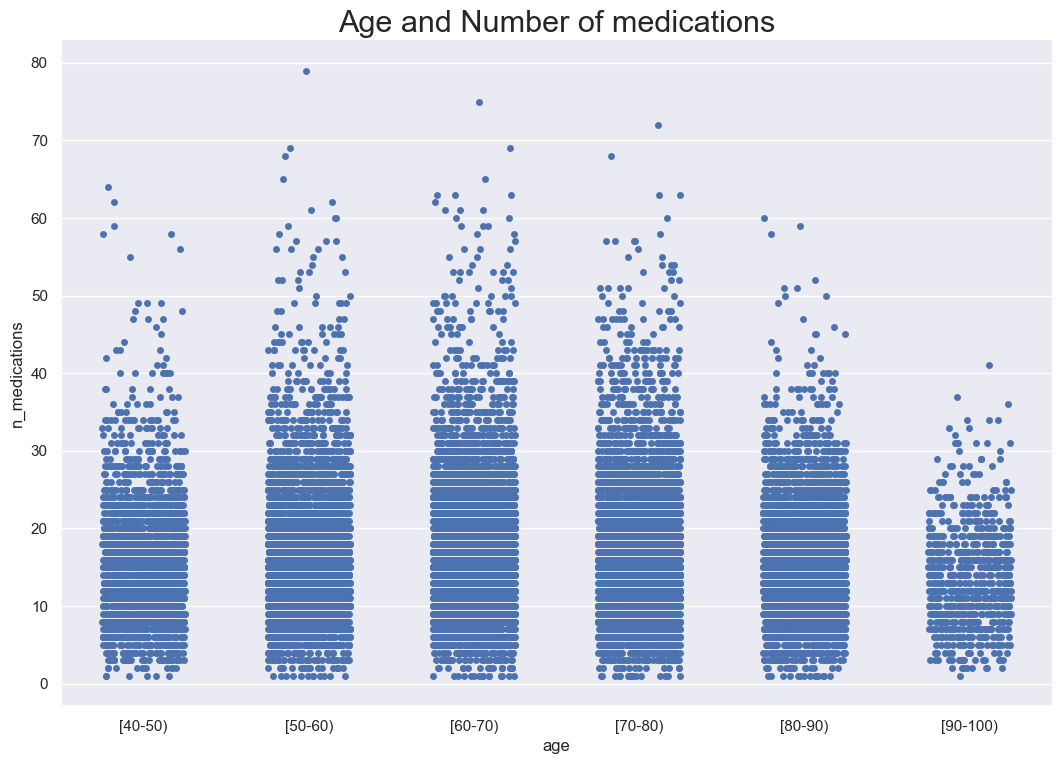

In [96]:
sns.catplot(x = "age", y = "n_medications", data=df, jitter = "0.25")
plt.gcf().set_size_inches(12, 8)
plt.title("Age and Number of medications", fontsize = 22)
plt.show()

In [97]:
plt.figure(figsize = (15, 15))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 patterns for predicting readmission within 30 days - XGBoost (64% validation Recall, outliers untreated)", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.show()

NameError: name 'xgb' is not defined

<Figure size 1500x1500 with 0 Axes>

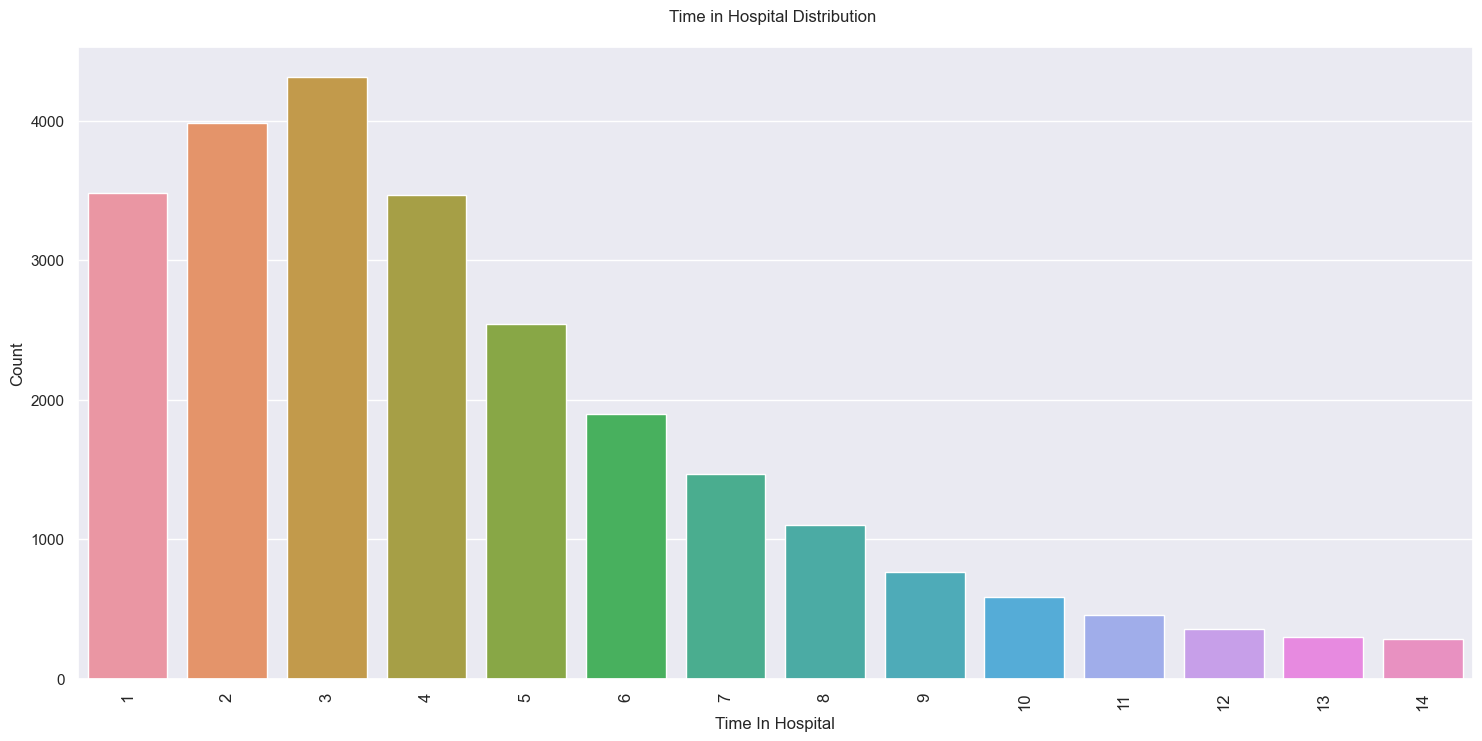

In [11]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',   data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Time in Hospital Distribution \n', size = 12)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


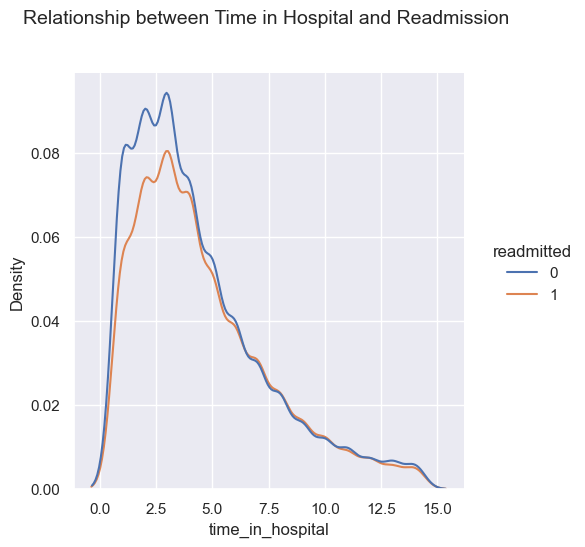

In [15]:

sns.set(rc={'figure.figsize':(18, 8.2)})
sns.displot(df, x="time_in_hospital", hue = 'readmitted', kind="kde")
plt.title('Relationship between Time in Hospital and Readmission \n\n', size  = 14)
plt.show()

In [37]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'lightgbm'

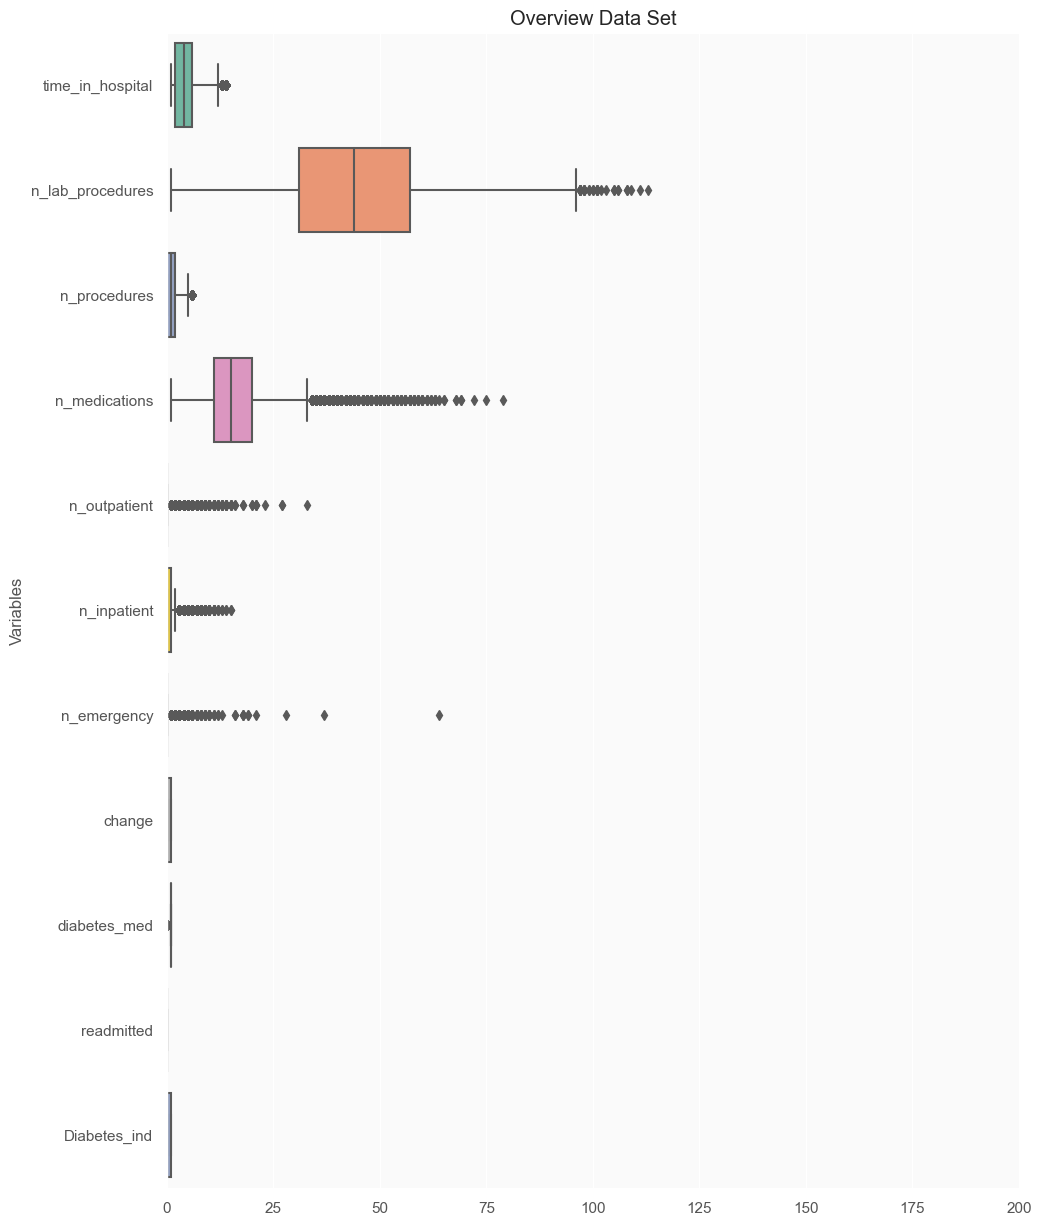

In [40]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [48]:
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,Diabetes_ind,readmitted_2
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0,0,No
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0,0,No
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,0,0,No
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,0,1,No
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,0,0,No
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,0,0,No
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,0,0,No
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0,1,No


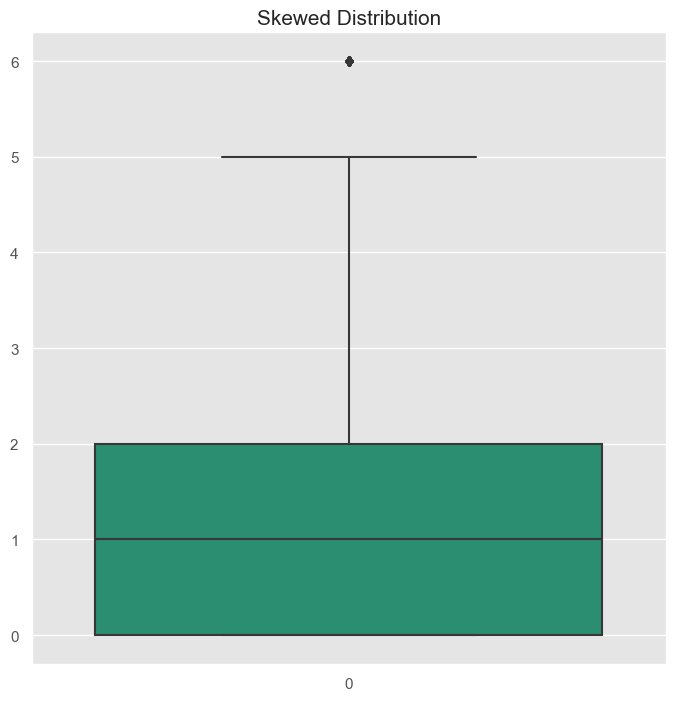

In [58]:
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df["n_procedures"], palette="Dark2")
plt.show()

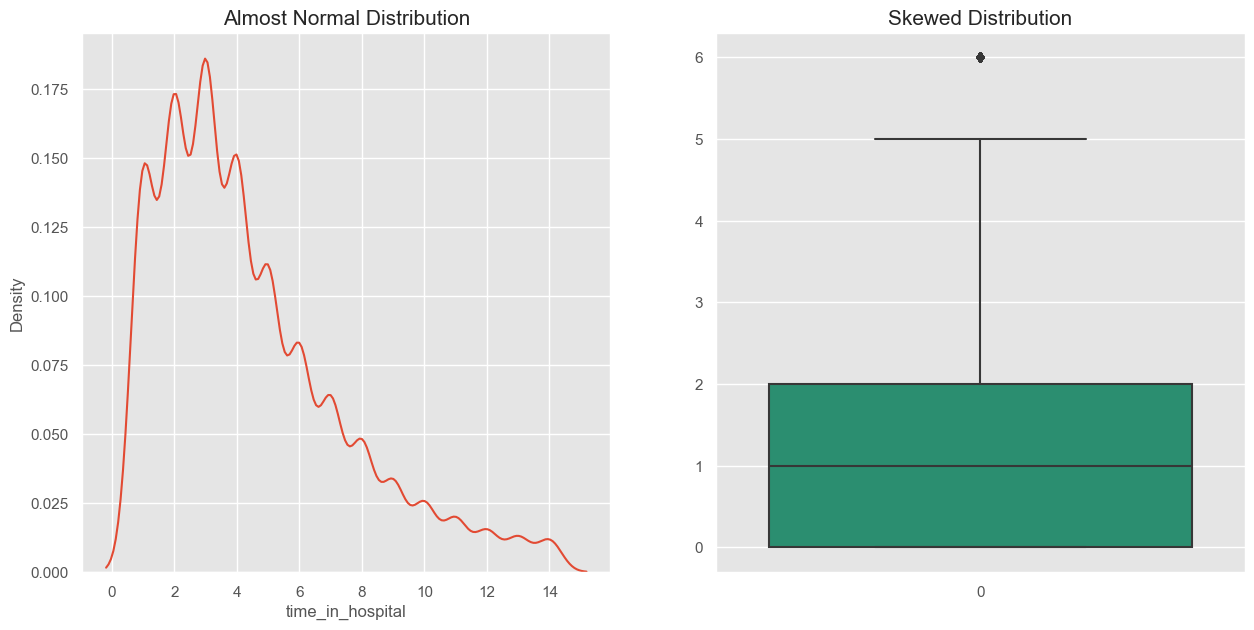

In [59]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = df["time_in_hospital"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = df["n_procedures"], palette="Dark2")
plt.show()


In [61]:

# Convert the object column to numeric
df['time_in_hospital'] = pd.to_numeric(df['time_in_hospital'], errors='coerce')

# Calculate the mean
mean_value = df['time_in_hospital'].mean()

print(f"Mean: {mean_value}")


Mean: 4.45332


In [84]:
norm_upper_limit = df["time_in_hospital"].mean() + 3 
norm_lower_limit = df["time_in_hospital"].mean() - 3 

dfn = df[(df["time_in_hospital"] > norm_lower_limit) & (df["time_in_hospital"] < norm_upper_limit)]


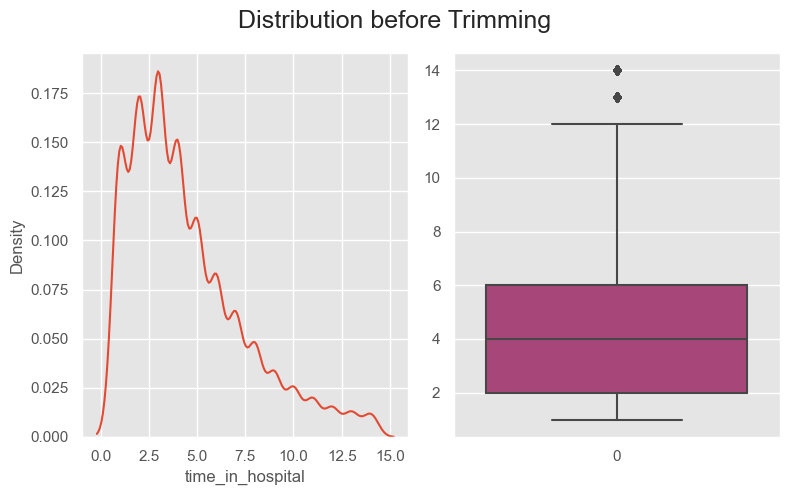

In [85]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df["time_in_hospital"])
plt.subplot(1,2,2)
sns.boxplot(data = df["time_in_hospital"], palette="magma")
plt.tight_layout()
plt.show()

KeyError: 0

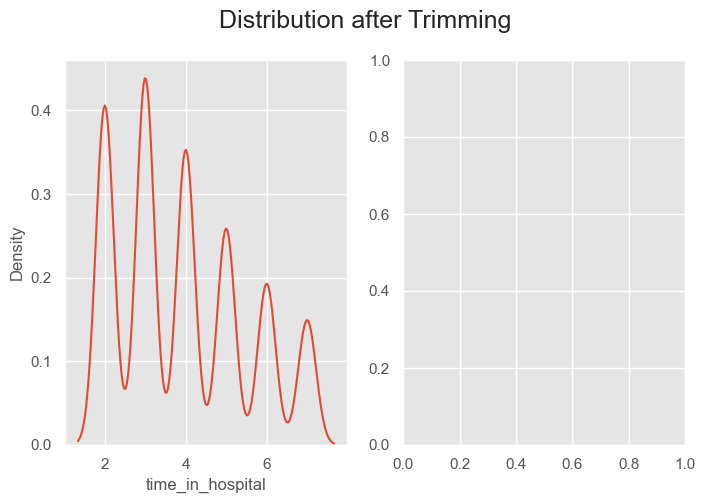

In [86]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = dfn["time_in_hospital"])
plt.subplot(1,2,2)
sns.boxplot(data = dfn["n_inpatient"], palette="magma")
plt.tight_layout()
plt.show()

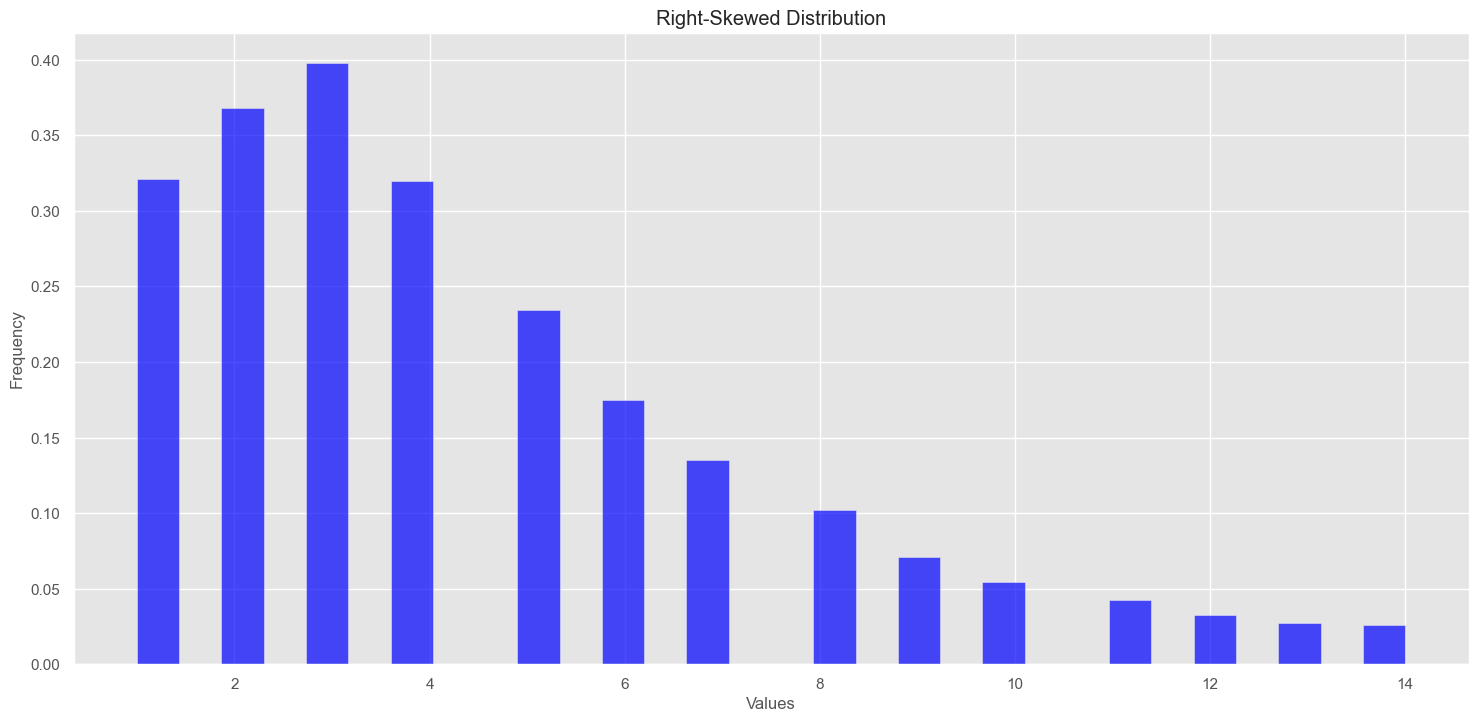

In [100]:


plt.hist(df["time_in_hospital"], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Right-Skewed Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

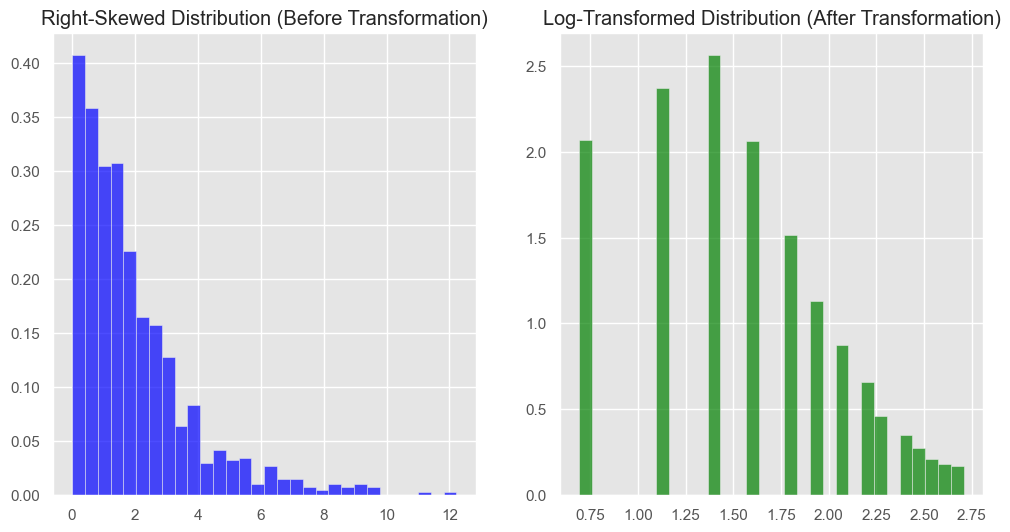

In [104]:


# Apply logarithmic transformation
transformed_data = np.log1p(df["time_in_hospital"])

# Plot histograms before and after transformation
plt.figure(figsize=(12, 6))

# Before transformation
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Right-Skewed Distribution (Before Transformation)')

# After transformation
plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, density=True, alpha=0.7, color='green')
plt.title('Log-Transformed Distribution (After Transformation)')

plt.show()

In [105]:
from scipy import stats

z_scores = np.abs(stats.zscore(data))
outliers = (z_scores > 3)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



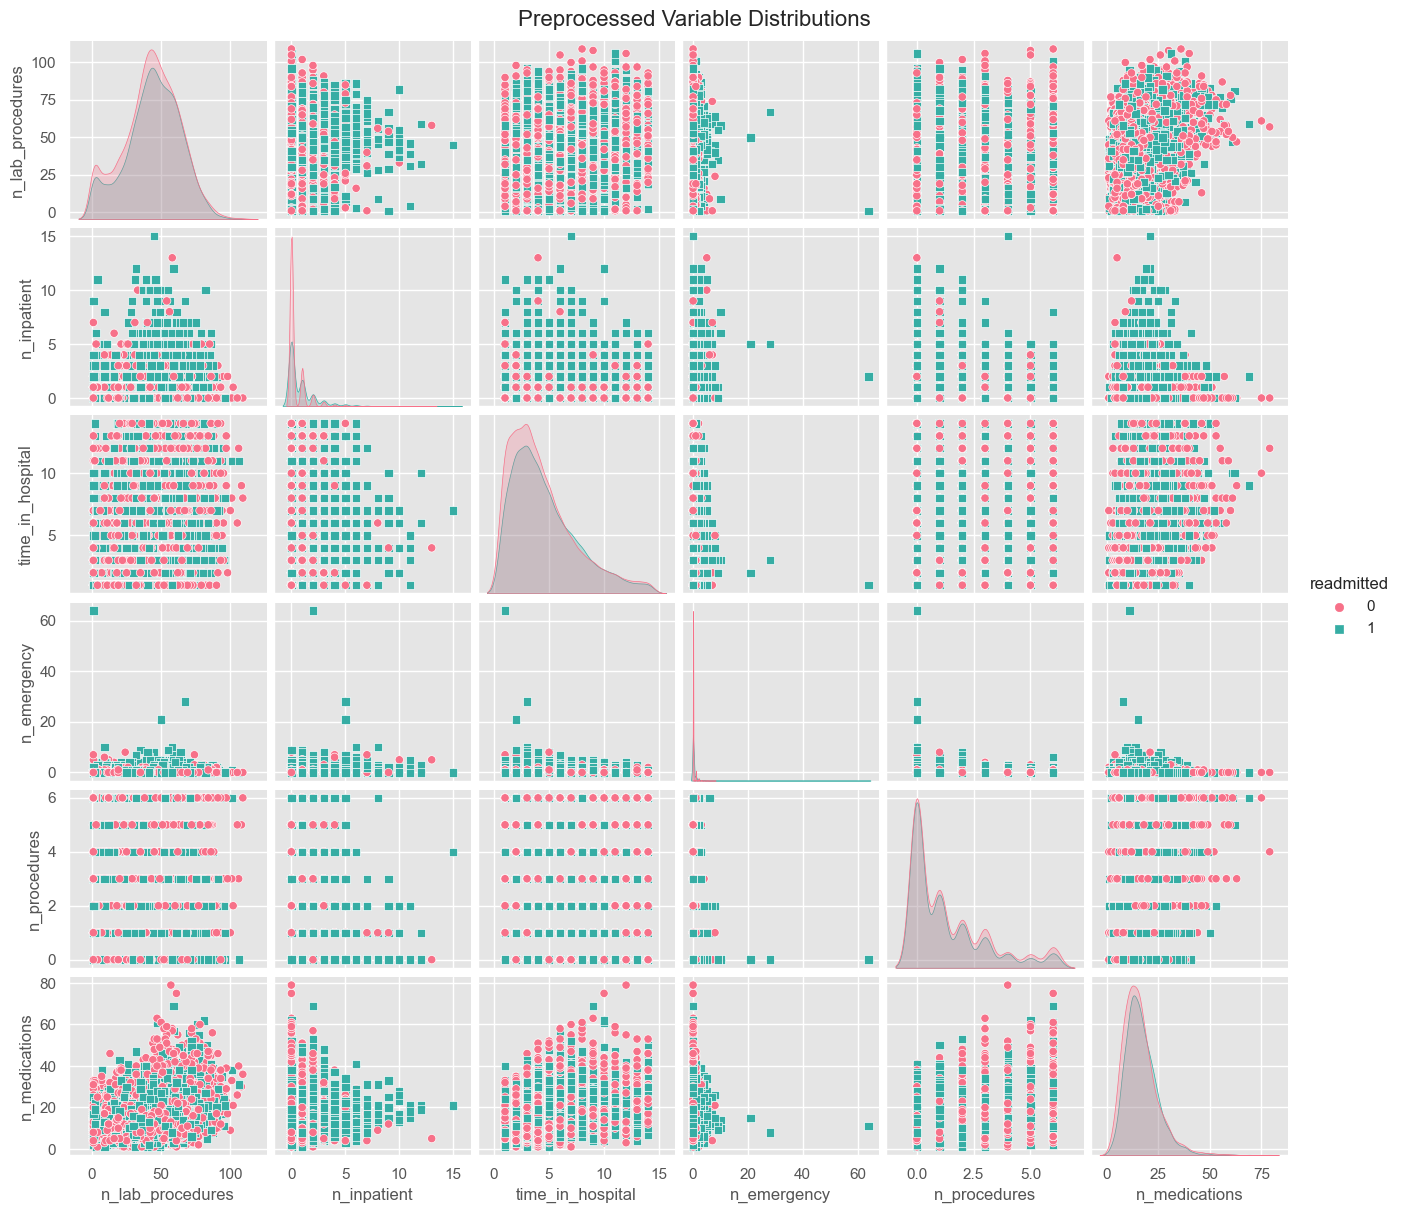

In [116]:
selected_features = ['n_lab_procedures', 'n_inpatient', 'time_in_hospital', 
                     'n_emergency', 'n_procedures', 'n_medications', 'readmitted']
df_processed = df_features[selected_features].sample(10000)

# Create a pairplot
g = sns.pairplot(data=df_processed, vars=selected_features[:-1], hue='readmitted', diag_kind='kde',
                 height=2, aspect=1.1, palette="husl", markers=['o', 's'])

# Set plot title
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16, y=1.01)

# Show the plot
plt.show()

In [119]:
df.select_dtypes(include='object').nunique()

age                  6
medical_specialty    7
diag_1               8
diag_2               8
diag_3               8
glucose_test         3
A1Ctest              3
readmitted_2         1
dtype: int64

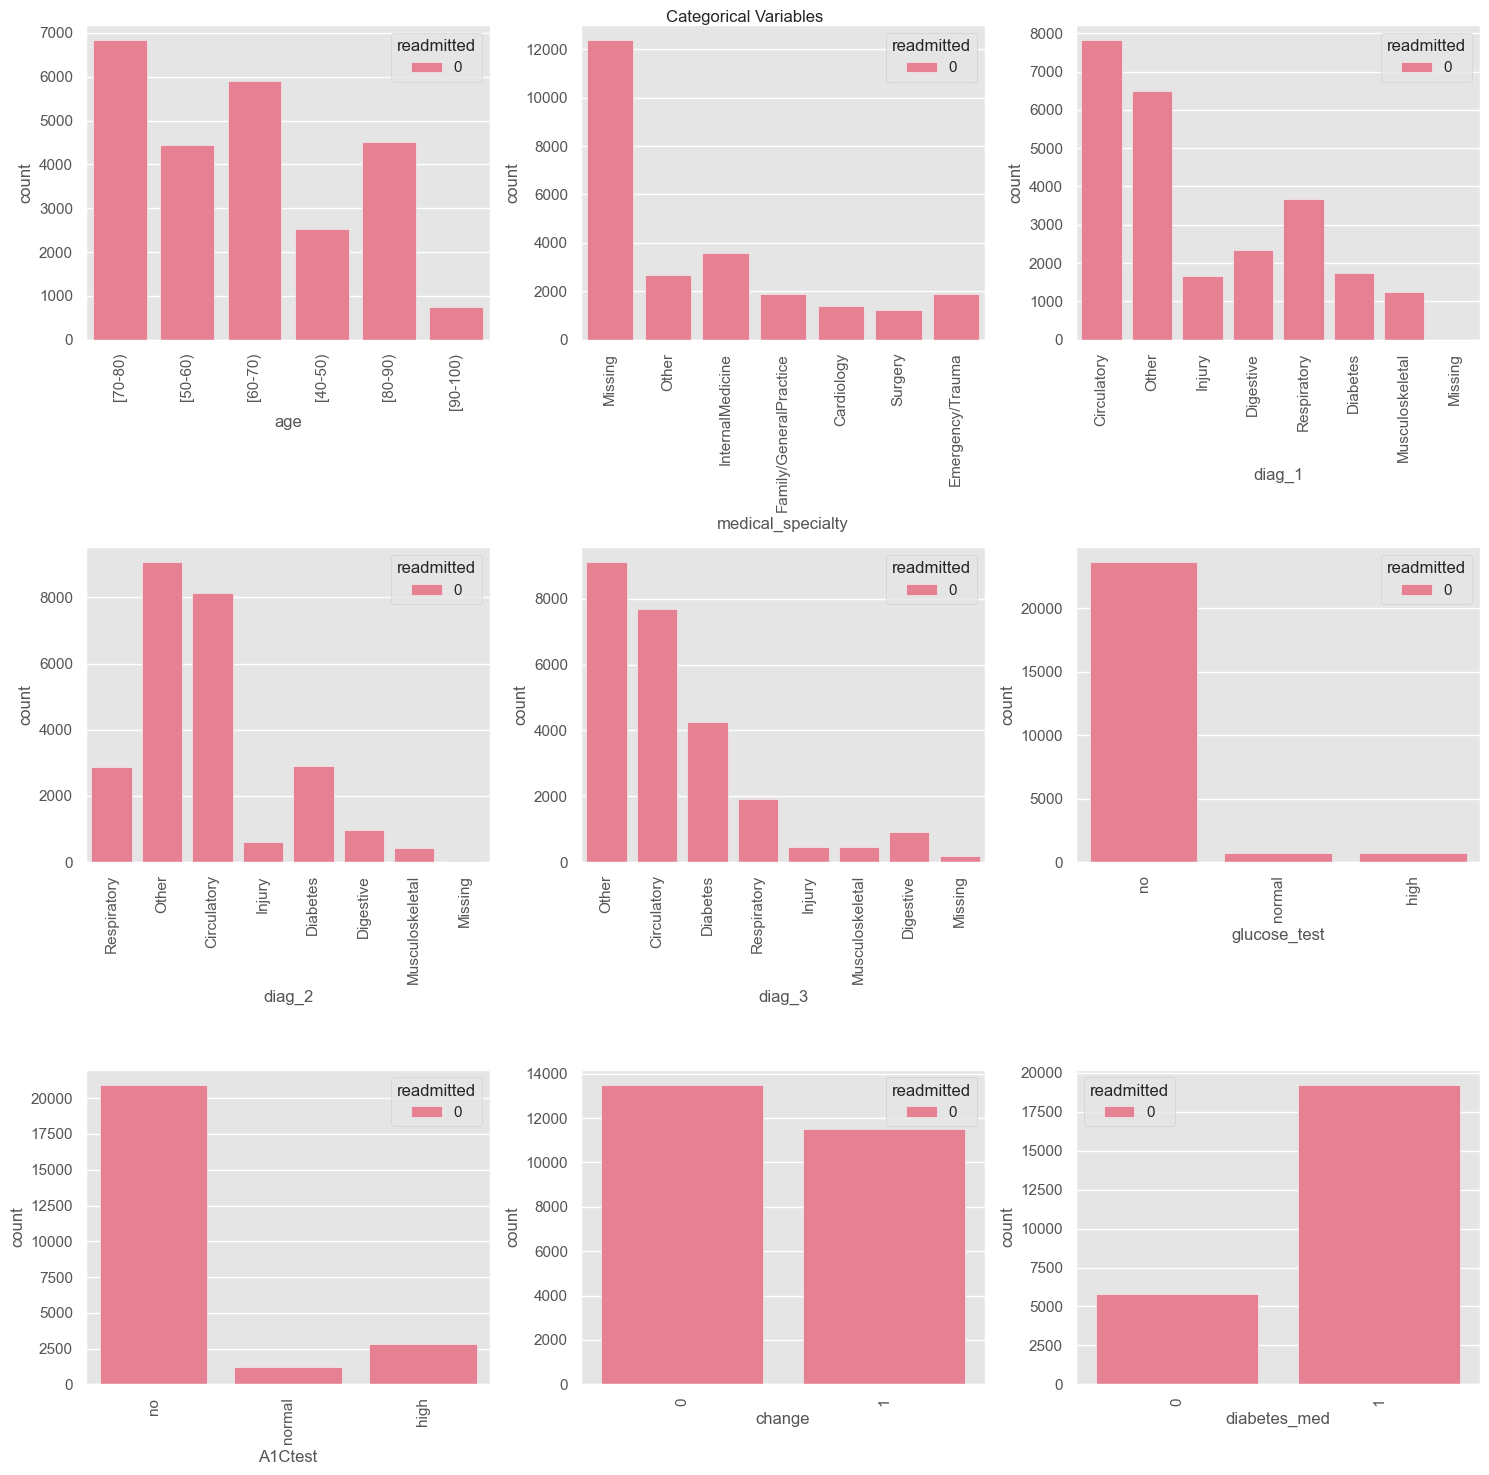

In [118]:
cat_vars = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

# creating figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs = axs.flatten()

fig.suptitle("Categorical Variables")

for i,var in enumerate(cat_vars):
    sns.countplot(x=var, hue='readmitted', data=df, ax=axs[i], palette="husl")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()    
plt.show()